In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
columns = ['datetime','choke','psig','apsig','oil','gas','water']
columns2 = ['choke','psig','apsig','oil','gas','water']

In [3]:
df_raw = pd.read_csv('final.csv')

# use 100 data only
# df_raw = df_raw.head(100)

df_raw = df_raw.set_index('datetime')

In [4]:
df_raw

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,38,935,320,698.880,4.980,23.616
15/5/2021 21:15:00,38,935,321,822.456,4.988,32.592
15/5/2021 21:30:00,38,940,318,661.368,5.070,26.208
15/5/2021 21:45:00,38,938,317,737.664,5.061,29.232
15/5/2021 22:00:00,38,940,319,661.368,5.078,26.208
...,...,...,...,...,...,...
4/6/2021 08:00:00,42,986,328,771.720,7.638,16.896
4/6/2021 08:15:00,42,984,325,766.032,7.602,16.704
4/6/2021 08:30:00,42,986,328,765.216,7.638,16.704


# normalization min max

In [5]:
def minmax_normalize(df):
    return (df - df.min()) / (df.max() - df.min())
    

In [6]:
df_normalized = df_raw.copy()
df_normalized[columns2] = minmax_normalize(df_normalized[columns2])

df_normalized

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,0.0,0.431034,0.444444,0.311858,0.080260,0.417431
15/5/2021 21:15:00,0.0,0.431034,0.472222,0.748918,0.082992,0.631881
15/5/2021 21:30:00,0.0,0.452586,0.388889,0.179187,0.110997,0.479358
15/5/2021 21:45:00,0.0,0.443966,0.361111,0.449028,0.107923,0.551606
15/5/2021 22:00:00,0.0,0.452586,0.416667,0.179187,0.113730,0.479358
...,...,...,...,...,...,...
4/6/2021 08:00:00,1.0,0.650862,0.666667,0.569476,0.988046,0.256881
4/6/2021 08:15:00,1.0,0.642241,0.583333,0.549359,0.975751,0.252294
4/6/2021 08:30:00,1.0,0.650862,0.666667,0.546473,0.988046,0.252294


In [7]:
df_normalized.describe()

,choke,psig,apsig,oil,gas,water
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,0.373536,0.746895,0.666164,0.568969,0.655763,0.256388
std,0.384998,0.220544,0.183364,0.136035,0.256358,0.125876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.659483,0.583333,0.466429,0.532275,0.233945
50%,0.500000,0.803879,0.666667,0.572023,0.764686,0.256881
75%,0.500000,0.922414,0.777778,0.670911,0.805328,0.275229
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
def plot_rows(df, columns):
    fig, ax = plt.subplots(len(columns), 1, figsize=(10, 10))
    for i, column in enumerate(columns):
        ax[i].plot(df.index, df[column])
        # reduce x label
        ax[i].set_xticks(ax[i].get_xticks()[::30])
        ax[i].set_title(column)
    plt.show()

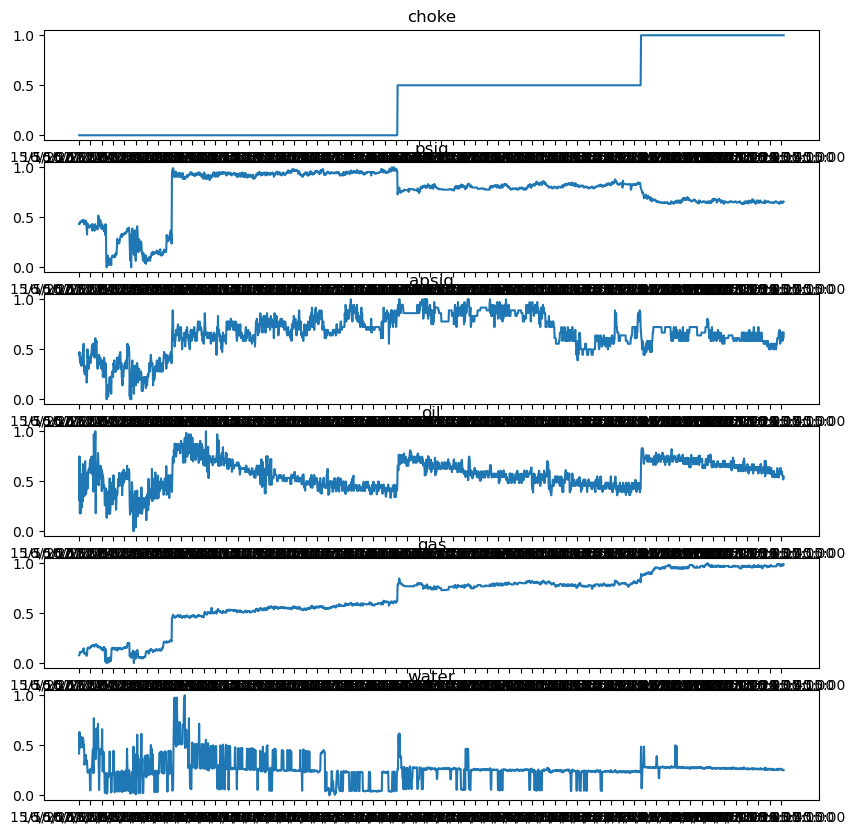

In [9]:
plot_rows(df_normalized, columns2)

# Reference
- https://medium.com/analytics-vidhya/lstms-explained-a-complete-technically-accurate-conceptual-guide-with-keras-2a650327e8f2
- https://bobrupakroy.medium.com/multivariate-multistep-lstm-38d9536a6b2e

![lstm_model](lstm_model.png)


In [10]:
# get choke 38 only
df_choke_38 = df_raw[df_raw['choke'] == 38].copy()
df_choke_38.head()

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,38,935,320,698.880,4.980,23.616
15/5/2021 21:15:00,38,935,321,822.456,4.988,32.592
15/5/2021 21:30:00,38,940,318,661.368,5.070,26.208
15/5/2021 21:45:00,38,938,317,737.664,5.061,29.232
15/5/2021 22:00:00,38,940,319,661.368,5.078,26.208


In [11]:
scaler = MinMaxScaler()

In [12]:
df_choke_38_normalized = scaler.fit_transform(df_choke_38)
df_choke_38_normalized = pd.DataFrame(df_choke_38_normalized, columns=columns2)
df_choke_38_normalized['datetime'] = df_choke_38.index
df_choke_38_normalized = df_choke_38_normalized.set_index('datetime')
df_choke_38_normalized

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,0.0,0.431034,0.444444,0.311858,0.128135,0.417431
15/5/2021 21:15:00,0.0,0.431034,0.472222,0.748918,0.132497,0.631881
15/5/2021 21:30:00,0.0,0.452586,0.388889,0.179187,0.177208,0.479358
15/5/2021 21:45:00,0.0,0.443966,0.361111,0.449028,0.172301,0.551606
15/5/2021 22:00:00,0.0,0.452586,0.416667,0.179187,0.181570,0.479358
...,...,...,...,...,...,...
24/5/2021 16:00:00,0.0,0.978448,0.833333,0.341397,0.982007,0.220183
24/5/2021 16:15:00,0.0,0.987069,0.722222,0.432816,0.966739,0.041284
24/5/2021 16:30:00,0.0,0.965517,0.777778,0.464392,0.978190,0.043578


In [13]:
# sigmoid
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
# sigmoid derivative
def sigmoid_derivative(x):
    return x * (1 - x)
# tanh
def tanh(x):
    return math.tanh(x)
# tanh derivative
def tanh_derivative(x):
    return 1.0 - x**2

In [14]:
# create simple LSTM cell no function and class
def simple_lstm_cell(inputs, h, c, Wf, Wi, Wc, Wo, bf, bi, bc, bo):
    """
    Implements a simple LSTM cell.

    Args:
        inputs (ndarray): Input array of shape (batch_size, input_size).
        h (ndarray): Hidden state array of shape (batch_size, hidden_size).
        c (ndarray): Cell state array of shape (batch_size, hidden_size).
        Wf (ndarray): Weight matrix for the forget gate of shape (input_size, hidden_size).
        Wi (ndarray): Weight matrix for the input gate of shape (input_size, hidden_size).
        Wc (ndarray): Weight matrix for the cell state of shape (input_size, hidden_size).
        Wo (ndarray): Weight matrix for the output gate of shape (input_size, hidden_size).
        bf (ndarray): Bias vector for the forget gate of shape (hidden_size,).
        bi (ndarray): Bias vector for the input gate of shape (hidden_size,).
        bc (ndarray): Bias vector for the cell state of shape (hidden_size,).
        bo (ndarray): Bias vector for the output gate of shape (hidden_size,).

    Returns:
        tuple: A tuple containing the updated hidden state (h) and cell state (c) arrays.
    """
    f = sigmoid(np.dot(inputs, Wf) + np.dot(h, bf))
    i = sigmoid(np.dot(inputs, Wi) + np.dot(h, bi))
    c_tilda = tanh(np.dot(inputs, Wc) + np.dot(h, bc))
    c = f * c + i * c_tilda
    o = sigmoid(np.dot(inputs, Wo) + np.dot(h, bo))
    h = o * tanh(c)
    return h, c

In [15]:
Wf = np.random.rand(6, 1)
Wi = np.random.rand(6, 1)
Wc = np.random.rand(6, 1)
Wo = np.random.rand(6, 1)
bf = np.random.rand(1)
bi = np.random.rand(1)
bc = np.random.rand(1)
bo = np.random.rand(1)

# print
# print('Wf:', Wf)
# print('Wi:', Wi)
# print('Wc:', Wc)
# print('Wo:', Wo)
# print('bf:', bf)
# print('bi:', bi)
# print('bc:', bc)
# print('bo:', bo)

# save weights as DataFrame
df_weights = pd.DataFrame({'Wf': Wf.flatten(), 'Wi': Wi.flatten(), 'Wc': Wc.flatten(), 'Wo': Wo.flatten()})
df_biases = pd.DataFrame({'bf': bf, 'bi': bi, 'bc': bc, 'bo': bo})

# save to .csv
df_weights.to_csv('weights.csv', index=False)
df_biases.to_csv('biases.csv', index=False)

display(df_weights)
display(df_biases)

,Wf,Wi,Wc,Wo
0,0.023666,0.337028,0.894221,0.827245
1,0.838564,0.649670,0.038090,0.214970
2,0.467434,0.169156,0.482427,0.227934
3,0.911298,0.073625,0.522474,0.302618
4,0.663783,0.735134,0.944483,0.582709
5,0.892178,0.876207,0.635008,0.472878


,bf,bi,bc,bo
0,0.850302,0.455639,0.713078,0.378069


In [16]:
cell = pd.DataFrame([], columns=['hidden state', 'cell state'])
# use function above
cell0 = simple_lstm_cell(
    df_choke_38_normalized.iloc[0].values,
    0,
    0,
    Wf,
    Wi,
    Wc,
    Wo,
    bf,
    bi,
    bc,
    bo
)

# create function to simplify code above line 19 and 22
def cell_append(self, new_cell):
    new_cell = pd.DataFrame([new_cell], columns=['hidden state', 'cell state'])
    return pd.concat([self, new_cell], ignore_index=True)
# append the first cell to the cell DataFrame
cell = cell_append(cell, cell0)

# print the updated cell DataFrame
cell

/tmp/ipykernel_22820/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_22820/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tanh(x)
/tmp/ipykernel_22820/214509461.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([self, new_cell], ignore_index=True)


,hidden state,cell state
0,0.27147,0.455579


In [17]:
df_choke_38_normalized

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,0.0,0.431034,0.444444,0.311858,0.128135,0.417431
15/5/2021 21:15:00,0.0,0.431034,0.472222,0.748918,0.132497,0.631881
15/5/2021 21:30:00,0.0,0.452586,0.388889,0.179187,0.177208,0.479358
15/5/2021 21:45:00,0.0,0.443966,0.361111,0.449028,0.172301,0.551606
15/5/2021 22:00:00,0.0,0.452586,0.416667,0.179187,0.181570,0.479358
...,...,...,...,...,...,...
24/5/2021 16:00:00,0.0,0.978448,0.833333,0.341397,0.982007,0.220183
24/5/2021 16:15:00,0.0,0.987069,0.722222,0.432816,0.966739,0.041284
24/5/2021 16:30:00,0.0,0.965517,0.777778,0.464392,0.978190,0.043578


In [18]:
df_choke_38_normalized.iloc[0]

choke    0.000000
psig     0.431034
apsig    0.444444
oil      0.311858
gas      0.128135
water    0.417431
Name: 15/5/2021 21:00:00, dtype: float64

In [19]:
# cell 1
cell1 = simple_lstm_cell(
    df_choke_38_normalized.iloc[1].values,
    cell[['hidden state']].iloc[0].values[0],
    cell[['cell state']].iloc[0].values[0],
    Wf,
    Wi,
    Wc,
    Wo,
    bf,
    bi,
    bc,
    bo
)
# cell1
# # append the second cell to the cell DataFrame
cell = cell_append(cell, cell1)
cell

/tmp/ipykernel_22820/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_22820/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tanh(x)


,hidden state,cell state
0,0.27147,0.455579
1,0.54743,1.039958


In [20]:
# what the result of that LSTM cell

#  create loop 
for i in range(2, len(df_choke_38_normalized)):
    new_cell = simple_lstm_cell(
        df_choke_38_normalized.iloc[i].values,
        cell[['hidden state']].iloc[-1].values[0],
        cell[['cell state']].iloc[-1].values[0],
        Wf,
        Wi,
        Wc,
        Wo,
        bf,
        bi,
        bc,
        bo
    )
    cell = cell_append(cell, new_cell)
    

/tmp/ipykernel_22820/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_22820/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tanh(x)
/tmp/ipykernel_22820/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_22820/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error 

In [21]:
# create neural network from that LSTM cell
def simple_lstm(inputs, h, c, Wf, Wi, Wc, Wo, bf, bi, bc, bo):
    hidden_states = []
    for i in range(len(inputs)):
        h, c = simple_lstm_cell(
            inputs[i],
            h,
            c,
            Wf,
            Wi,
            Wc,
            Wo,
            bf,
            bi,
            bc,
            bo
        )
        hidden_states.append(h)
    return hidden_states

/tmp/ipykernel_22820/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_22820/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tanh(x)


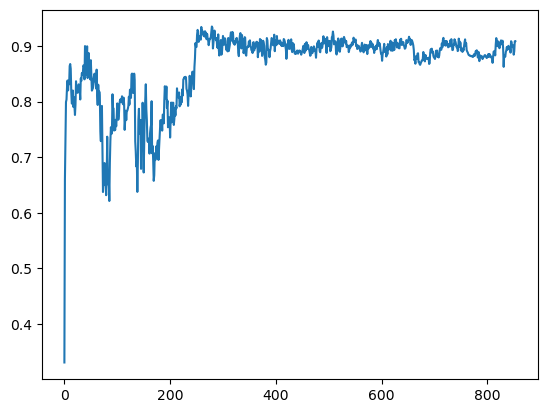

In [22]:
# use that function
hidden_states = simple_lstm(
    df_choke_38_normalized.values,
    0,
    0,
    Wf,
    Wi,
    Wc,
    Wo,
    bf,
    bi,
    bc,
    bo
)
# plot the hidden states
plt.plot(hidden_states)

In [23]:
# unroll prediction
def simple_lstm_unroll(inputs, h, c, Wf, Wi, Wc, Wo, bf, bi, bc, bo):
    hidden_states = []
    for i in range(len(inputs)):
        h, c = simple_lstm_cell(
            inputs[i],
            h,
            c,
            Wf,
            Wi,
            Wc,
            Wo,
            bf,
            bi,
            bc,
            bo
        )
        hidden_states.append(h)
    return hidden_states, h, c

In [24]:
lstm_unroll = simple_lstm_unroll(
    df_choke_38_normalized.values,
    0,
    0,
    Wf,
    Wi,
    Wc,
    Wo,
    bf,
    bi,
    bc,
    bo
)
print(lstm_unroll)

([0.3316775964066165, 0.6661170277690394, 0.6636197600808279, 0.7519716750501588, 0.7363917545310803, 0.7827162157093176, 0.8169239154498426, 0.776144942347991, 0.8155498541305409, 0.7965387284244717, 0.8581172001251007, 0.8595875549081544, 0.8377650384098813, 0.7920227071014686, 0.7641564321079822, 0.7735105746139673, 0.8146289410658979, 0.7567493155216574, 0.7790217895378367, 0.752761681617566, 0.7385583745392929, 0.763735050369891, 0.8139144310060558, 0.7817422111146635, 0.8031529296612071, 0.7979197537388895, 0.8061603894539692, 0.8134188492044556, 0.8117769866506288, 0.8068612000187434, 0.7792698917164024, 0.8345854104356273, 0.8240188771251754, 0.8459991476901926, 0.8333541634497018, 0.8449703754029549, 0.8537304454181647, 0.8564718944164446, 0.8081560024997073, 0.911305212494653, 0.8578270114321284, 0.83461500294235, 0.874668877726707, 0.9084442356658168, 0.7977689786346793, 0.8613807519822927, 0.8841252066922041, 0.8495746427142209, 0.847708166089977, 0.8353745729010171, 0.8834

/tmp/ipykernel_22820/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_22820/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tanh(x)


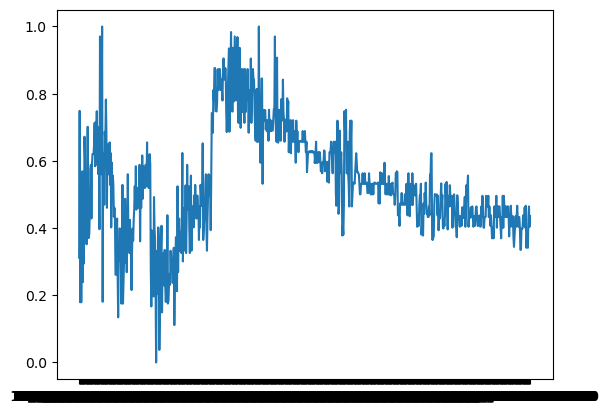

In [25]:
# plot
plt.plot(df_choke_38_normalized.index, df_choke_38_normalized['oil'], label='Actual')

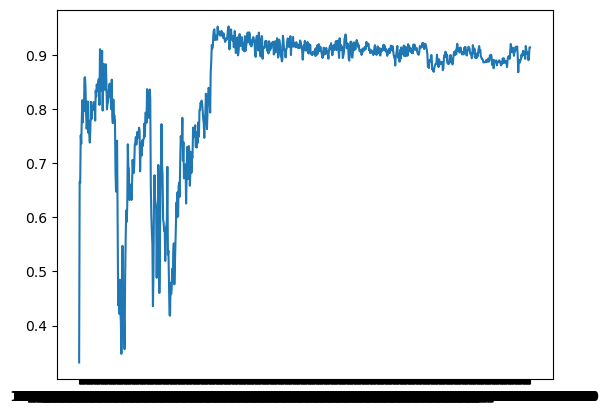

In [26]:
# plot
plt.plot(df_choke_38_normalized.index, lstm_unroll[0], label='Predicted')

In [27]:
lstm_unroll

([0.3316775964066165,
  0.6661170277690394,
  0.6636197600808279,
  0.7519716750501588,
  0.7363917545310803,
  0.7827162157093176,
  0.8169239154498426,
  0.776144942347991,
  0.8155498541305409,
  0.7965387284244717,
  0.8581172001251007,
  0.8595875549081544,
  0.8377650384098813,
  0.7920227071014686,
  0.7641564321079822,
  0.7735105746139673,
  0.8146289410658979,
  0.7567493155216574,
  0.7790217895378367,
  0.752761681617566,
  0.7385583745392929,
  0.763735050369891,
  0.8139144310060558,
  0.7817422111146635,
  0.8031529296612071,
  0.7979197537388895,
  0.8061603894539692,
  0.8134188492044556,
  0.8117769866506288,
  0.8068612000187434,
  0.7792698917164024,
  0.8345854104356273,
  0.8240188771251754,
  0.8459991476901926,
  0.8333541634497018,
  0.8449703754029549,
  0.8537304454181647,
  0.8564718944164446,
  0.8081560024997073,
  0.911305212494653,
  0.8578270114321284,
  0.83461500294235,
  0.874668877726707,
  0.9084442356658168,
  0.7977689786346793,
  0.8613807519822

In [40]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def lstm_forward(x, h_prev, c_prev, W_f, U_f, b_f, W_i, U_i, b_i, W_o, U_o, b_o, W_c, U_c, b_c):
    f_t = sigmoid(np.dot(x, W_f) + np.dot(h_prev, U_f) + b_f)
    i_t = sigmoid(np.dot(x, W_i) + np.dot(h_prev, U_i) + b_i)
    o_t = sigmoid(np.dot(x, W_o) + np.dot(h_prev, U_o) + b_o)
    c_tilde_t = np.tanh(np.dot(x, W_c) + np.dot(h_prev, U_c) + b_c)
    c_t = f_t * c_prev + i_t * c_tilde_t
    h_t = o_t * np.tanh(c_t)
    return h_t, c_t

def predict(h, c, W_out, b_out):
    return np.dot(h, W_out) + b_out

# Initialize learnable parameters
W_f = np.random.rand(6, 6)
U_f = np.random.rand(6, 6)
b_f = np.random.rand(6)
W_i = np.random.rand(6, 6)
U_i = np.random.rand(6, 6)
b_i = np.random.rand(6)
W_o = np.random.rand(6, 6)
U_o = np.random.rand(6, 6)
b_o = np.random.rand(6)
W_c = np.random.rand(6, 6)
U_c = np.random.rand(6, 6)
b_c = np.random.rand(6)
W_out = np.random.rand(6, 6)
b_out = np.random.rand(6)

# print
print('W_f:', W_f)
print('U_f:', U_f)
print('b_f:', b_f)
print('W_i:', W_i)
print('U_i:', U_i)
print('b_i:', b_i)
print('W_o:', W_o)
print('U_o:', U_o)
print('b_o:', b_o)
print('W_c:', W_c)
print('U_c:', U_c)
print('b_c:', b_c)
print('W_out:', W_out)
print('b_out:', b_out)

# save parameter as txt
text = f"W_f: {W_f}"
text += f"\nU_f: {U_f}"
text += f"\nb_f: {b_f}"
text += f"\nW_i: {W_i}"
text += f"\nU_i: {U_i}"
text += f"\nb_i: {b_i}"
text += f"\nW_o: {W_o}"
text += f"\nU_o: {U_o}"
text += f"\nb_o: {b_o}"
text += f"\nW_c: {W_c}"
text += f"\nU_c: {U_c}"
text += f"\nb_c: {b_c}"
text += f"\nW_out: {W_out}"
text += f"\nb_out: {b_out}"
with open('parameter.txt', 'w') as f:
    f.write(text)

# Initialize hidden state and cell state
h_prev = np.zeros((6,))
c_prev = np.zeros((6,))

predicted_scratch = np.array([])
# Perform forward pass and prediction
# for t in range(len(df_choke_38_normalized.values)):
for t in range(400):
    x_t = df_choke_38_normalized.values[t]
    h_t, c_t = lstm_forward(x_t, h_prev, c_prev, W_f, U_f, b_f, W_i, U_i, b_i, W_o, U_o, b_o, W_c, U_c, b_c)
    h_prev = h_t
    c_prev = c_t
    predicted_values = predict(h_t, c_t, W_out, b_out)
    # append array without flatten
    predicted_scratch = np.append(predicted_scratch, predicted_values)
    print(predicted_values)

W_f: [[0.55087314 0.32275174 0.59478706 0.93099562 0.57837369 0.39755789]
 [0.72917023 0.88427929 0.26641919 0.28695781 0.44609056 0.80326975]
 [0.61057907 0.7381482  0.09418419 0.47503268 0.51313048 0.92982455]
 [0.18644127 0.74640661 0.64509427 0.09223498 0.82388864 0.79181613]
 [0.07684246 0.97572789 0.7096104  0.12016467 0.40465042 0.14845499]
 [0.19147335 0.5187486  0.55708132 0.40050426 0.63589496 0.86844827]]
U_f: [[0.58256073 0.78806278 0.00164218 0.57880748 0.7245645  0.54571887]
 [0.26588189 0.31304111 0.27036055 0.85300587 0.6452586  0.41202526]
 [0.53666137 0.00857289 0.8848337  0.63588009 0.26268149 0.99717168]
 [0.18262422 0.84294654 0.40229019 0.94291742 0.57539132 0.5588071 ]
 [0.47063415 0.97261472 0.88223124 0.30041705 0.31707272 0.29427113]
 [0.13804766 0.32427139 0.82980786 0.87989826 0.68769835 0.41402232]]
b_f: [0.18677066 0.17285987 0.51117658 0.14644035 0.82934304 0.51785678]
W_i: [[0.81675697 0.32007433 0.2628921  0.88818262 0.12600044 0.42275346]
 [0.63305738 

In [41]:
predicted_scratch_reshaped = np.reshape(predicted_scratch, (-1,6))
predicted_scratch_reshaped

array([[1.23431323, 2.2206142 , 2.03625184, 2.22624935, 1.55474465,
        1.76655849],
       [2.44252947, 3.93880846, 3.12503558, 3.79562331, 2.84243803,
        2.85831076],
       [2.77038174, 4.46979862, 3.43086171, 4.27386809, 3.23044092,
        3.1661991 ],
       ...,
       [2.87063555, 4.66134077, 3.54473809, 4.43849435, 3.37778765,
        3.29346454],
       [2.86479211, 4.65353158, 3.53921066, 4.43072044, 3.37188928,
        3.28945397],
       [2.86844951, 4.65889285, 3.54296724, 4.4358407 , 3.37603797,
        3.29260828]])

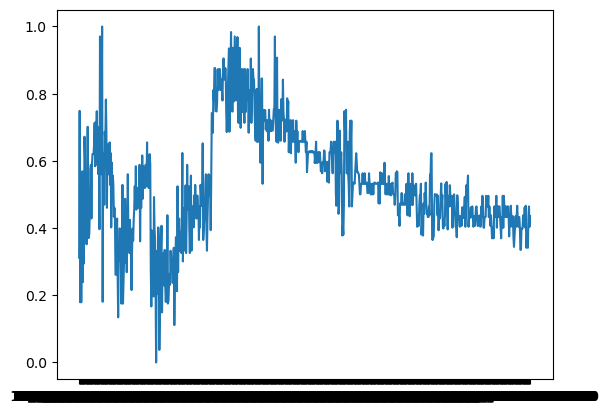

In [42]:
# plot predicted_scratch
plt.plot(df_choke_38_normalized.index, df_choke_38_normalized['oil'], label='Actual')

# FIRST STEP
mungkin ini yang terjadi kalau ambil hidden cellnya

/tmp/ipykernel_22820/2710147636.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


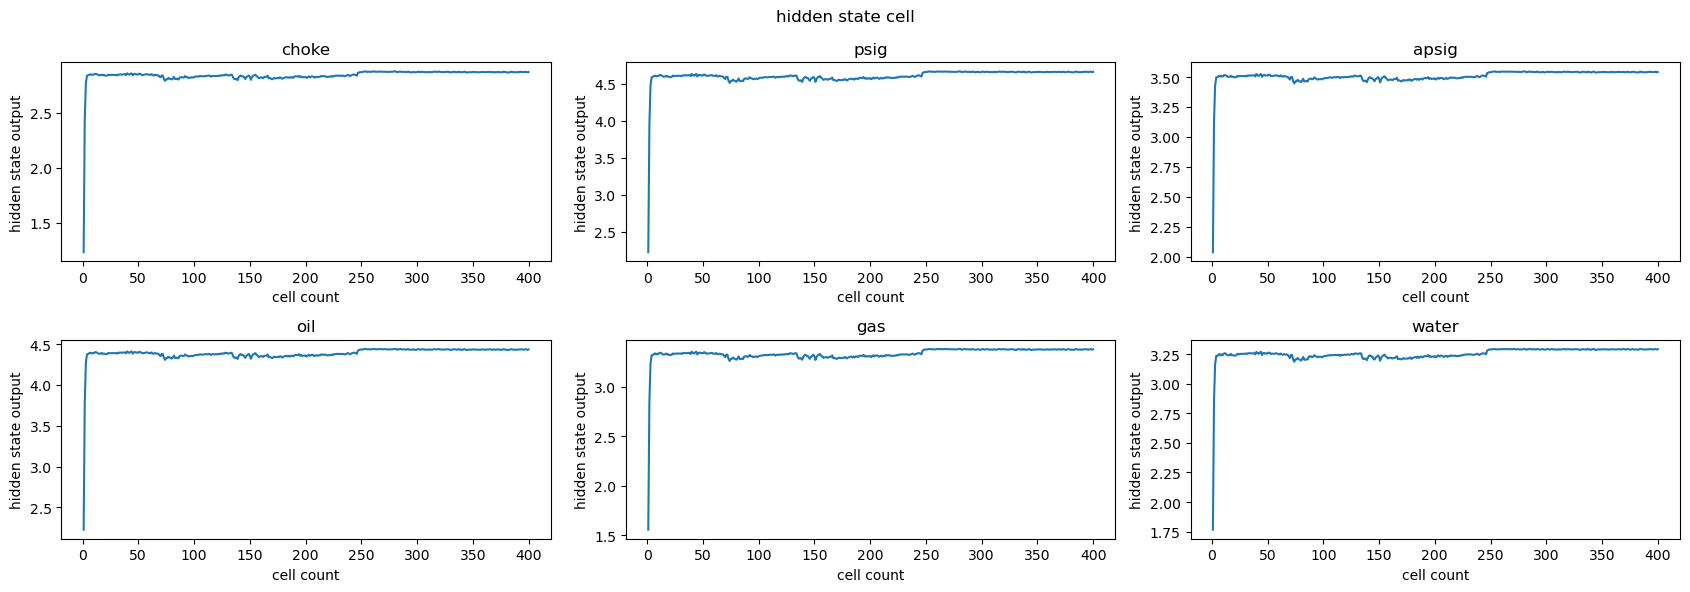

In [45]:
# plot predicted_scratch_reshaped
# plt.plot(range(predicted_scratch_reshaped.shape[0]), predicted_scratch_reshaped, label='Predicted')
fig, ax = plt.subplots(figsize=(17,6), nrows=2, ncols=3)
for i in range(6):
    # ax[i//3, i%3].plot(range(1, df_choke_38_normalized.shape[0]+1), predicted_scratch_reshaped[:,i], label='end of hidden state')
    ax[i//3, i%3].plot(range(1, 401), predicted_scratch_reshaped[:400,i], label='end of hidden state')
    ax[i//3, i%3].set_title(columns2[i])
    ax[i//3, i%3].set_xlabel('cell count')
    ax[i//3, i%3].set_ylabel('hidden state output')
    # add gap each axis

fig.suptitle('hidden state cell')
fig.tight_layout()
fig.show()

In [ ]:
predicted_scratch_reshaped

array([[2.34501183, 2.26773064, 1.87335173, 2.336163  , 1.60078414,
        1.93670982],
       [3.80812097, 3.5851036 , 2.98619201, 3.75966775, 3.16901893,
        3.57731394],
       [4.15660504, 3.8849383 , 3.2306578 , 4.0984339 , 3.54901039,
        3.95216241],
       ...,
       [4.25715327, 3.96304992, 3.30228953, 4.18328487, 3.6537084 ,
        4.06187078],
       [4.25912021, 3.96529702, 3.30452309, 4.1849519 , 3.65572631,
        4.06460732],
       [4.25921794, 3.96541731, 3.30466587, 4.18503324, 3.6558105 ,
        4.06477842]])